In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns

In [3]:
data_all = pd.read_csv('Test_5L.csv', low_memory=False)

In [4]:
#Removing rows where a Sold price is less than zero
data_all = data_all[data_all['SOLD_PRICE'] >= 0]

In [5]:
data_all.isna().sum()

SKU             0
SIZE            0
NAME            0
SOLD_AT         0
SOLD_PRICE      0
CONDITION       0
SOURCE          0
GENDER          0
BRAND           0
SILHOUETTE      0
COLORWAY        0
RETAILPRICE     0
RELEASEDATE     0
IS_COLLAB       0
COLLABORATOR    0
COLOR           0
SIZE_VALUE      0
IS_WIDE         0
IS_UK           0
IS_EU           0
dtype: int64

# Data Preprocessing

In [6]:
data_all['SOLD_AT'] = pd.to_datetime(data_all['SOLD_AT'])
data_all['RELEASEDATE'] = pd.to_datetime(data_all['RELEASEDATE'])

# Converting 'RELEASEDATE' to datetime to match with the timezone of SOLD_AT
data_all['RELEASEDATE'] = pd.to_datetime(data_all['RELEASEDATE']).dt.tz_localize('UTC')

data_all['TIME_SINCE_RELEASE'] = (data_all['SOLD_AT'] - data_all['RELEASEDATE']).dt.days

# Visualizing the Data and understanding relationships between the variables

In [7]:
brand_sales = data_all.groupby('BRAND')['SOLD_PRICE'].count()
brand_sales_sorted = brand_sales.sort_values(ascending=False)
brand_avg_price = data_all.groupby('BRAND')['SOLD_PRICE'].mean()
brand_avg_price_sorted = brand_avg_price.sort_values(ascending=False)

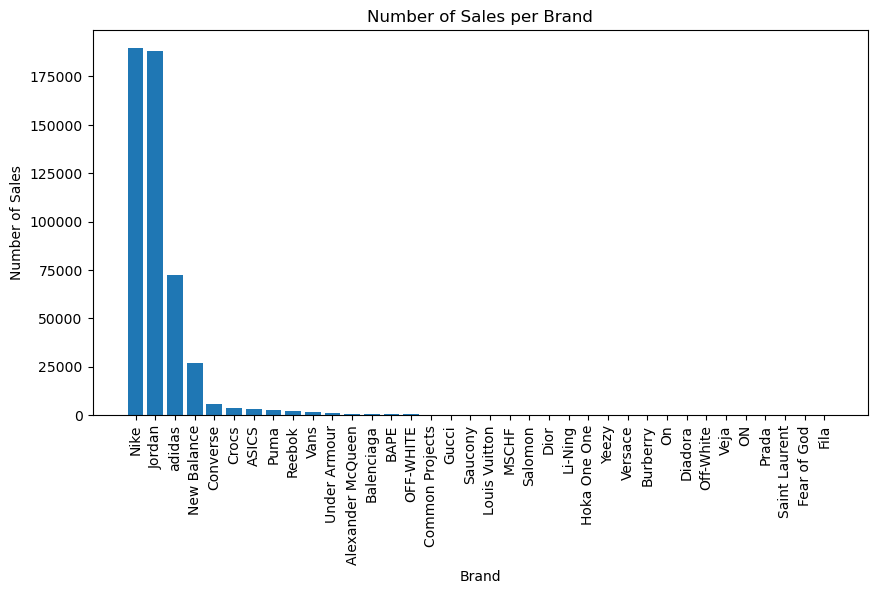

In [8]:
plt.figure(figsize=(10, 5))
plt.bar(brand_sales_sorted.index, brand_sales_sorted.values)
plt.title('Number of Sales per Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Sales')
plt.xticks(rotation=90)
plt.show()

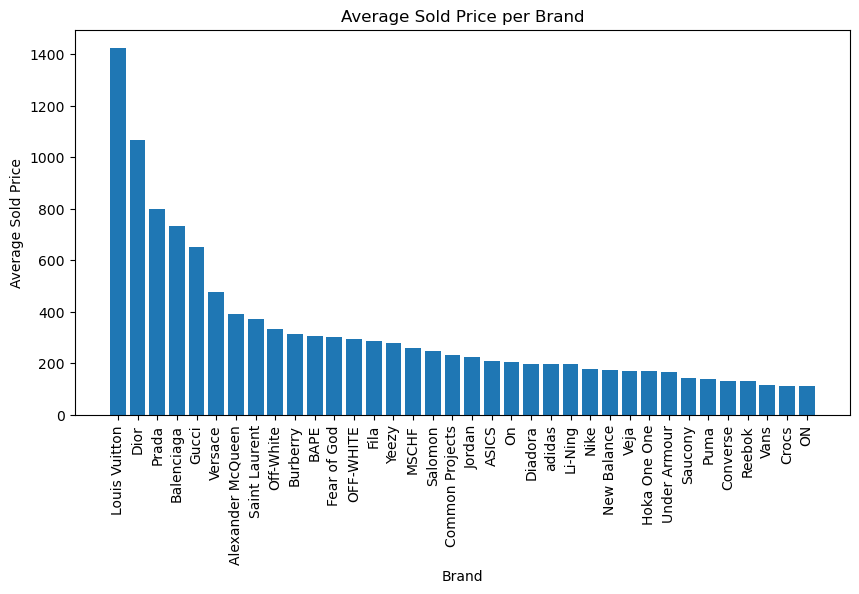

In [9]:
plt.figure(figsize=(10, 5))
plt.bar(brand_avg_price_sorted.index, brand_avg_price_sorted.values)
plt.title('Average Sold Price per Brand')
plt.xlabel('Brand')
plt.ylabel('Average Sold Price')
plt.xticks(rotation=90)
plt.show()

In [11]:
#Dropping the unnecessary columns

data_all.drop(data_all.columns[[1,14]]  , axis = 1, inplace = True)
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   SKU                 500000 non-null  object             
 1   NAME                500000 non-null  object             
 2   SOLD_AT             500000 non-null  datetime64[ns, UTC]
 3   SOLD_PRICE          500000 non-null  float64            
 4   CONDITION           500000 non-null  object             
 5   SOURCE              500000 non-null  object             
 6   GENDER              500000 non-null  object             
 7   BRAND               500000 non-null  object             
 8   SILHOUETTE          500000 non-null  object             
 9   COLORWAY            500000 non-null  object             
 10  RETAILPRICE         500000 non-null  float64            
 11  RELEASEDATE         500000 non-null  datetime64[ns, UTC]
 12  IS_COLLAB       

In [15]:
#Selecting a single brand for further analysis

unique_brand = 'Nike'
unique_brand_data = data_all[data_all['BRAND'] == unique_brand].copy()
unique_brand_data.drop(unique_brand_data.columns[[7]]  , axis = 1, inplace = True)
unique_brand_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189534 entries, 2 to 499994
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   SKU                 189534 non-null  object             
 1   NAME                189534 non-null  object             
 2   SOLD_AT             189534 non-null  datetime64[ns, UTC]
 3   SOLD_PRICE          189534 non-null  float64            
 4   CONDITION           189534 non-null  object             
 5   SOURCE              189534 non-null  object             
 6   GENDER              189534 non-null  object             
 7   SILHOUETTE          189534 non-null  object             
 8   COLORWAY            189534 non-null  object             
 9   RETAILPRICE         189534 non-null  float64            
 10  RELEASEDATE         189534 non-null  datetime64[ns, UTC]
 11  IS_COLLAB           189534 non-null  bool               
 12  COLOR           

In [13]:
unique_brand_data

,SKU,NAME,SOLD_AT,SOLD_PRICE,CONDITION,SOURCE,GENDER,SILHOUETTE,COLORWAY,RETAILPRICE,RELEASEDATE,IS_COLLAB,COLOR,SIZE_VALUE,IS_WIDE,IS_UK,IS_EU,TIME_SINCE_RELEASE
2,DR9773-300,Nike Air Max 1 SH Treeline,2022-06-07 16:55:11+00:00,189.0,is_new,stockx,men,Air Max 1,Treeline/Light Bordeax,150.0,2022-05-07 00:00:00+00:00,False,grey,9.0,False,False,False,31
4,DD1391-004,Nike Dunk Low Championship Goldenrod (2021),2022-06-07 16:55:15+00:00,148.0,is_new,stockx,men,Dunk,Black/Goldenrod/White,100.0,2021-12-16 00:00:00+00:00,False,black,11.5,False,False,False,173
5,BQ4635-102,Nike Air Max 90 Slide White Turf Orange Speckled,2022-06-07 16:55:16+00:00,85.0,is_new,stockx,men,Air Max 90,White/Turf Orange/Aquamarine/Black,75.0,2021-06-20 00:00:00+00:00,False,white,11.0,False,False,False,352
6,DV3501-400,Nike Air Force 1 Low White Navy Grey,2022-06-07 16:55:17+00:00,152.0,is_new,stockx,men,Air Force 1,White/Navy-Grey,100.0,2022-04-01 00:00:00+00:00,False,white,8.0,False,False,False,67
10,DV3501-400,Nike Air Force 1 Low White Navy Grey,2022-06-07 16:55:37+00:00,155.0,is_new,stockx,men,Air Force 1,White/Navy-Grey,100.0,2022-04-01 00:00:00+00:00,False,white,9.0,False,False,False,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499986,DV5078-001,Nike SB Blazer Mid QS Supreme Black,2022-10-22 19:47:10.642000+00:00,136.0,is_new,grailed,men,Blazer,Black/Black,118.0,2022-09-08 00:00:00+00:00,True,black,10.5,False,False,False,44
499990,BV0073-100,Nike LD Waffle sacai Summit White,2022-10-22 19:47:41+00:00,450.0,is_new,stockx,men,LDWaffle,Summit White/White-Wolf Grey-Black,160.0,2019-09-12 00:00:00+00:00,True,grey,12.0,False,False,False,1136
499991,BQ3378-100,Nike M2K Tekno Cool White (Women's),2022-10-22 19:47:43+00:00,88.0,is_new,stockx,women,M2K Tekno,White/Cool Grey/Black,90.0,2018-11-17 00:00:00+00:00,False,white,8.0,False,False,False,1435
499992,CI9925-300,Nike Air Zoom Alphafly Next% Hyper Turquoise,2022-10-22 19:47:44+00:00,138.0,is_new,stockx,men,Air Zoom Alphafly NEXT%,Hyper Turquoise/White-Black-Oracle Aqua,275.0,2018-08-13 00:00:00+00:00,False,white,9.5,False,False,False,1531


# Feature Importance using Random Forest

In [16]:
# Performing Label encoding on Categorical Data

le = LabelEncoder()
data_categorical = unique_brand_data[['SKU', 'NAME', 'SOLD_AT', 'CONDITION', 'SOURCE', 'GENDER', 'SILHOUETTE', 'COLORWAY', 'RELEASEDATE', 'IS_COLLAB', 'COLOR', 'SIZE_VALUE', 'IS_WIDE', 'IS_UK', 'IS_EU', 'TIME_SINCE_RELEASE']]

for i in (data_categorical.columns):
    flattened_slice = data_categorical[i].ravel()
    encoded_slice = le.fit_transform(flattened_slice)
    unique_brand_data[f"{i}_ENCODED"] = encoded_slice.reshape(data_categorical[i].shape)
    

In [17]:
unique_brand_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189534 entries, 2 to 499994
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   SKU                         189534 non-null  object             
 1   NAME                        189534 non-null  object             
 2   SOLD_AT                     189534 non-null  datetime64[ns, UTC]
 3   SOLD_PRICE                  189534 non-null  float64            
 4   CONDITION                   189534 non-null  object             
 5   SOURCE                      189534 non-null  object             
 6   GENDER                      189534 non-null  object             
 7   SILHOUETTE                  189534 non-null  object             
 8   COLORWAY                    189534 non-null  object             
 9   RETAILPRICE                 189534 non-null  float64            
 10  RELEASEDATE                 189534 non-null 

In [18]:
# Dropping the original columns and using encoded columns for feature selection

unique_brand_data.drop(unique_brand_data.columns[[0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]  , axis = 1, inplace = True)

In [19]:
unique_brand_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189534 entries, 2 to 499994
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SOLD_PRICE                  189534 non-null  float64
 1   SKU_ENCODED                 189534 non-null  int32  
 2   NAME_ENCODED                189534 non-null  int32  
 3   SOLD_AT_ENCODED             189534 non-null  int32  
 4   CONDITION_ENCODED           189534 non-null  int32  
 5   SOURCE_ENCODED              189534 non-null  int32  
 6   GENDER_ENCODED              189534 non-null  int32  
 7   SILHOUETTE_ENCODED          189534 non-null  int32  
 8   COLORWAY_ENCODED            189534 non-null  int32  
 9   RELEASEDATE_ENCODED         189534 non-null  int32  
 10  IS_COLLAB_ENCODED           189534 non-null  int64  
 11  COLOR_ENCODED               189534 non-null  int32  
 12  SIZE_VALUE_ENCODED          189534 non-null  int64  
 13  IS_WIDE_ENCODE

In [20]:
# Renaming the columns

column_names = {
    'SKU_ENCODED': 'SKU',
    'NAME_ENCODED': 'NAME',
    'SOLD_AT_ENCODED': "SOLD_AT",
    'CONDITION_ENCODED': 'CONDITION',
    'SOURCE_ENCODED': 'SOURCE',
    'GENDER_ENCODED': 'GENDER',
    'SILHOUETTE_ENCODED': 'SILHOUETTE',
    'COLORWAY_ENCODED': 'COLORWAY',
    'RELEASEDATE_ENCODED': 'RELEASEDATE',
    'IS_COLLAB_ENCODED': 'IS_COLLAB',
    'COLOR_ENCODED': 'COLOR',
    'SIZE_VALUE_ENCODED': 'SIZE_VALUE',
    'IS_WIDE_ENCODED': 'IS_WIDE',
    'IS_UK_ENCODED': 'IS_UK',
    'IS_EU_ENCODED': 'IS_EU',
    'TIME_SINCE_RELEASE_ENCODED': 'TIME_SINCE_RELEASE'
}

unique_brand_data = unique_brand_data.rename(columns=column_names)

In [21]:
unique_brand_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189534 entries, 2 to 499994
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SOLD_PRICE          189534 non-null  float64
 1   SKU                 189534 non-null  int32  
 2   NAME                189534 non-null  int32  
 3   SOLD_AT             189534 non-null  int32  
 4   CONDITION           189534 non-null  int32  
 5   SOURCE              189534 non-null  int32  
 6   GENDER              189534 non-null  int32  
 7   SILHOUETTE          189534 non-null  int32  
 8   COLORWAY            189534 non-null  int32  
 9   RELEASEDATE         189534 non-null  int32  
 10  IS_COLLAB           189534 non-null  int64  
 11  COLOR               189534 non-null  int32  
 12  SIZE_VALUE          189534 non-null  int64  
 13  IS_WIDE             189534 non-null  int64  
 14  IS_UK               189534 non-null  int64  
 15  IS_EU               189534 non-nul

In [22]:
features = ['SKU', 'NAME', 'SOLD_AT', 'CONDITION', 'SOURCE', 'GENDER', 'SILHOUETTE', 'COLORWAY', 'RELEASEDATE', 'IS_COLLAB', 'COLOR', 'SIZE_VALUE', 'IS_WIDE', 'IS_UK', 'IS_EU', 'TIME_SINCE_RELEASE']
x = unique_brand_data[features]
y = unique_brand_data['SOLD_PRICE']

In [23]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x, y)

RandomForestRegressor(random_state=42)

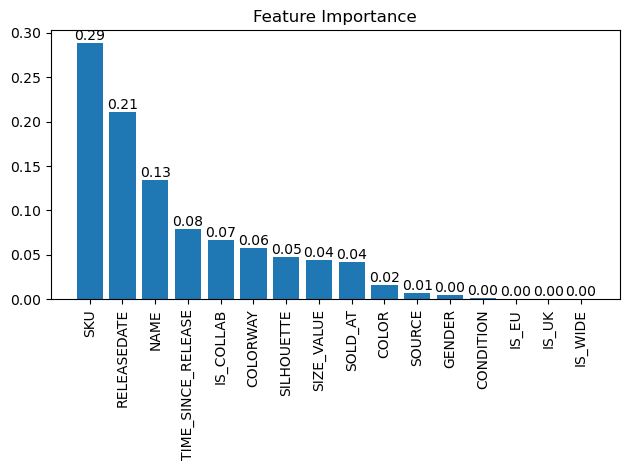

In [24]:
importances = model.feature_importances_
sorted_index = np.argsort(importances)[::-1]
plt.title('Feature Importance')
bars = plt.bar(range(x.shape[1]), importances[sorted_index], align='center')
plt.xticks(range(x.shape[1]), x.columns[sorted_index], rotation=90)
for idx, val in enumerate(importances[sorted_index]):
    plt.text(idx, val, f'{val:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Selecting data of single sku for further analysis

In [25]:
unique_sku = 'DV0562-600'
unique_sku_data = data_all[data_all['SKU'] == unique_sku].copy()

unique_sku_data.drop('SKU', axis=1, inplace=True)

print (unique_sku_data)

                                NAME                          SOLD_AT  \
97      Jordan 5 Retro Easter (2022)        2022-06-07 17:02:13+00:00   
543     Jordan 5 Retro Easter (2022)        2022-06-07 17:35:01+00:00   
547     Jordan 5 Retro Easter (2022)        2022-06-07 17:35:32+00:00   
672     Jordan 5 Retro Easter (2022) 2022-06-07 17:45:12.351000+00:00   
758     Jordan 5 Retro Easter (2022)        2022-06-07 17:51:09+00:00   
...                              ...                              ...   
488318  Jordan 5 Retro Easter (2022)        2022-10-21 20:10:27+00:00   
489975  Jordan 5 Retro Easter (2022)        2022-10-21 22:21:52+00:00   
491468  Jordan 5 Retro Easter (2022) 2022-10-22 00:28:46.189000+00:00   
495603  Jordan 5 Retro Easter (2022)        2022-10-22 13:32:14+00:00   
497260  Jordan 5 Retro Easter (2022)        2022-10-22 16:12:19+00:00   

        SOLD_PRICE CONDITION  SOURCE GENDER   BRAND    SILHOUETTE  \
97           185.0    is_new  stockx    men  Jordan  A

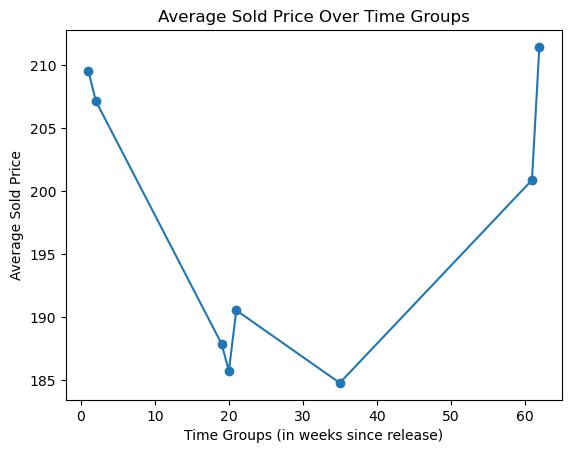

In [26]:
#Grouping into 7-day (one week) intervals
unique_sku_data['time_group'] = unique_sku_data['TIME_SINCE_RELEASE'] // 7
grouped_data = unique_sku_data.groupby('time_group')['SOLD_PRICE'].mean()

grouped_data.plot(kind='line', marker = 'o')
plt.title('Average Sold Price Over Time Groups')
plt.xlabel('Time Groups (in weeks since release)')
plt.ylabel('Average Sold Price')
plt.show()

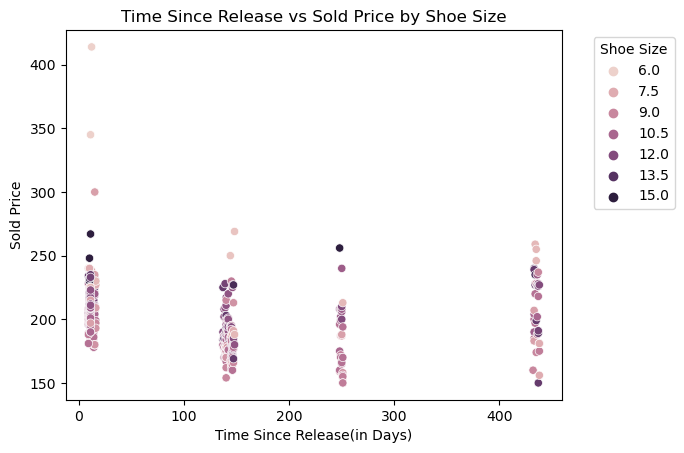

In [27]:
sns.scatterplot(data=unique_sku_data, x='TIME_SINCE_RELEASE', y='SOLD_PRICE', hue='SIZE_VALUE')

plt.title('Time Since Release vs Sold Price by Shoe Size')
plt.xlabel('Time Since Release(in Days)')
plt.ylabel('Sold Price')

plt.legend(title='Shoe Size', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Predicting the future price

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras import *
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import mean_squared_error
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [29]:
data_1 = unique_brand_data[['SKU', 'RELEASEDATE', 'NAME', 'TIME_SINCE_RELEASE', 'IS_COLLAB']]
data_2 = unique_brand_data[['SOLD_PRICE']]

In [30]:
data_1

,SKU,RELEASEDATE,NAME,TIME_SINCE_RELEASE,IS_COLLAB
2,10415,2178,2662,244,0
4,7965,2047,6942,386,0
5,3554,1876,3574,565,0
6,10644,2143,2052,280,0
10,10644,2143,2052,280,0
...,...,...,...,...,...
499986,10678,2299,9794,257,1
499990,3833,1293,8493,1349,1
499991,3498,1062,8980,1648,0
499992,4583,991,5750,1743,0


# Using Standard Scaler to scale the variables

In [31]:
scaler1 = StandardScaler()
scaler2 = StandardScaler()

In [32]:
x = scaler1.fit_transform(data_1)
y = scaler2.fit_transform(data_2)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
model = Sequential()
model.add(Input(5,))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2497 (9.75 KB)
Trainable params: 2497 (9.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

In [49]:
model.fit(x_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

Epoch 1/40
3791/3791 [==============================] - 8s 2ms/step - loss: 0.7008 - val_loss: 0.2948
Epoch 2/40
3791/3791 [==============================] - 10s 3ms/step - loss: 0.6650 - val_loss: 0.2793
Epoch 3/40
3791/3791 [==============================] - 8s 2ms/step - loss: 0.6475 - val_loss: 0.3842
Epoch 4/40
3791/3791 [==============================] - 9s 2ms/step - loss: 0.6117 - val_loss: 0.4312
Epoch 5/40
3791/3791 [==============================] - 8s 2ms/step - loss: 0.5926 - val_loss: 0.3339
Epoch 6/40
3791/3791 [==============================] - 8s 2ms/step - loss: 0.5981 - val_loss: 0.2902
Epoch 7/40
3791/3791 [==============================] - 8s 2ms/step - loss: 0.5484 - val_loss: 0.2742
Epoch 8/40
3791/3791 [==============================] - 8s 2ms/step - loss: 0.5349 - val_loss: 0.2655
Epoch 9/40
3791/3791 [==============================] - 7s 2ms/step - loss: 0.5352 - val_loss: 0.2849
Epoch 10/40
3791/3791 [==============================] - 7s 2ms/step - loss: 0.51

In [50]:
y_pred = model.predict(x_test)

1185/1185 [==============================] - 2s 1ms/step


# Scaling back the labels

In [40]:
y_prediction = scaler2.inverse_transform(y_pred).flatten()
y_actuals = scaler2.inverse_transform(y_test).flatten()

In [60]:
# Calculating the MSE

rmse = mean_squared_error(y_actuals, y_prediction, squared=False)
print(f'Mean Squared error: {rmse}')

Mean Squared error: 169.46543506586679


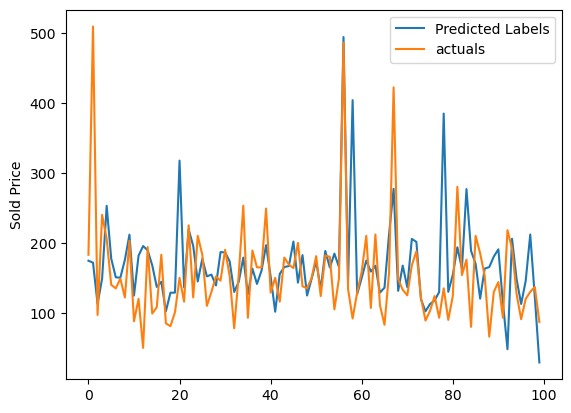

In [61]:
# Visualizing the actual and predicted labels

sns.lineplot(x=results.index, y='Train Prediction', data=results, label='Predicted Labels', )
sns.lineplot(x=results.index, y='actuals', data=results, label='actuals')
plt.ylabel("Sold Price")
plt.legend()
plt.show()